In [519]:
import numpy as np
import pandas as pd
import seaborn as sb
from dython.nominal import associations, identify_nominal_columns
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, confusion_matrix, accuracy_score
from sklearn.svm import SVR
from sklearn import ensemble

# Perform exploratory data analysis and feature selection

In [520]:
col_names = ["symboling", "normalized-losses", "make",
             "fuel-type", "aspiration", "num-of-doors", "body-style", "drive-wheels",
             "engine-location", "wheel-base", "length", "width", "height", "curb-weight",
             "engine-type", "num-of-cylinders", "engine-size", "fuel-system", "bore",
             "stroke", "compression-ratio", "horsepower", "peak-rpm", "city-mpg", "highway-mpg", "price"]

df = pd.read_csv("data.csv", header=None, names=col_names)


## Modifying data from "?" to NaN

In [521]:
df.isnull().sum()


symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [522]:
df.replace("?", float("NaN"), inplace=True)

In [523]:
df.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

## Converting types of certain columns from "object" to "numeric"

In [524]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [525]:
df["price"] =  pd.to_numeric(df["price"])
df["bore"] = pd.to_numeric(df["bore"])
df["stroke"] = pd.to_numeric(df["stroke"])
df["horsepower"] = pd.to_numeric(df["horsepower"])
df["peak-rpm"] = pd.to_numeric(df["peak-rpm"])
df["normalized-losses"] = pd.to_numeric(df["normalized-losses"])

In [526]:
df.dtypes

symboling              int64
normalized-losses    float64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

## Replacing "normalized-losses" missing values with the mean of the column

In [527]:
df["normalized-losses"] = df["normalized-losses"].replace(np.nan, df.describe()["normalized-losses"]["mean"])


In [528]:
df

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
201,-1,95.0,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
202,-1,95.0,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
203,-1,95.0,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0


## Dropping rows with missing values

In [529]:
print(df.shape)
df.isnull().sum()

(205, 26)


symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         2
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 4
stroke               4
compression-ratio    0
horsepower           2
peak-rpm             2
city-mpg             0
highway-mpg          0
price                4
dtype: int64

In [530]:
for i in df.columns:
    if (df[i].isnull().sum() != 0):
        df = df.drop(list((df.loc[df[i].isnull()]).index))

In [531]:
print(df.shape)
df.isnull().sum()


(193, 26)


symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

## Generating Correlation Matrix

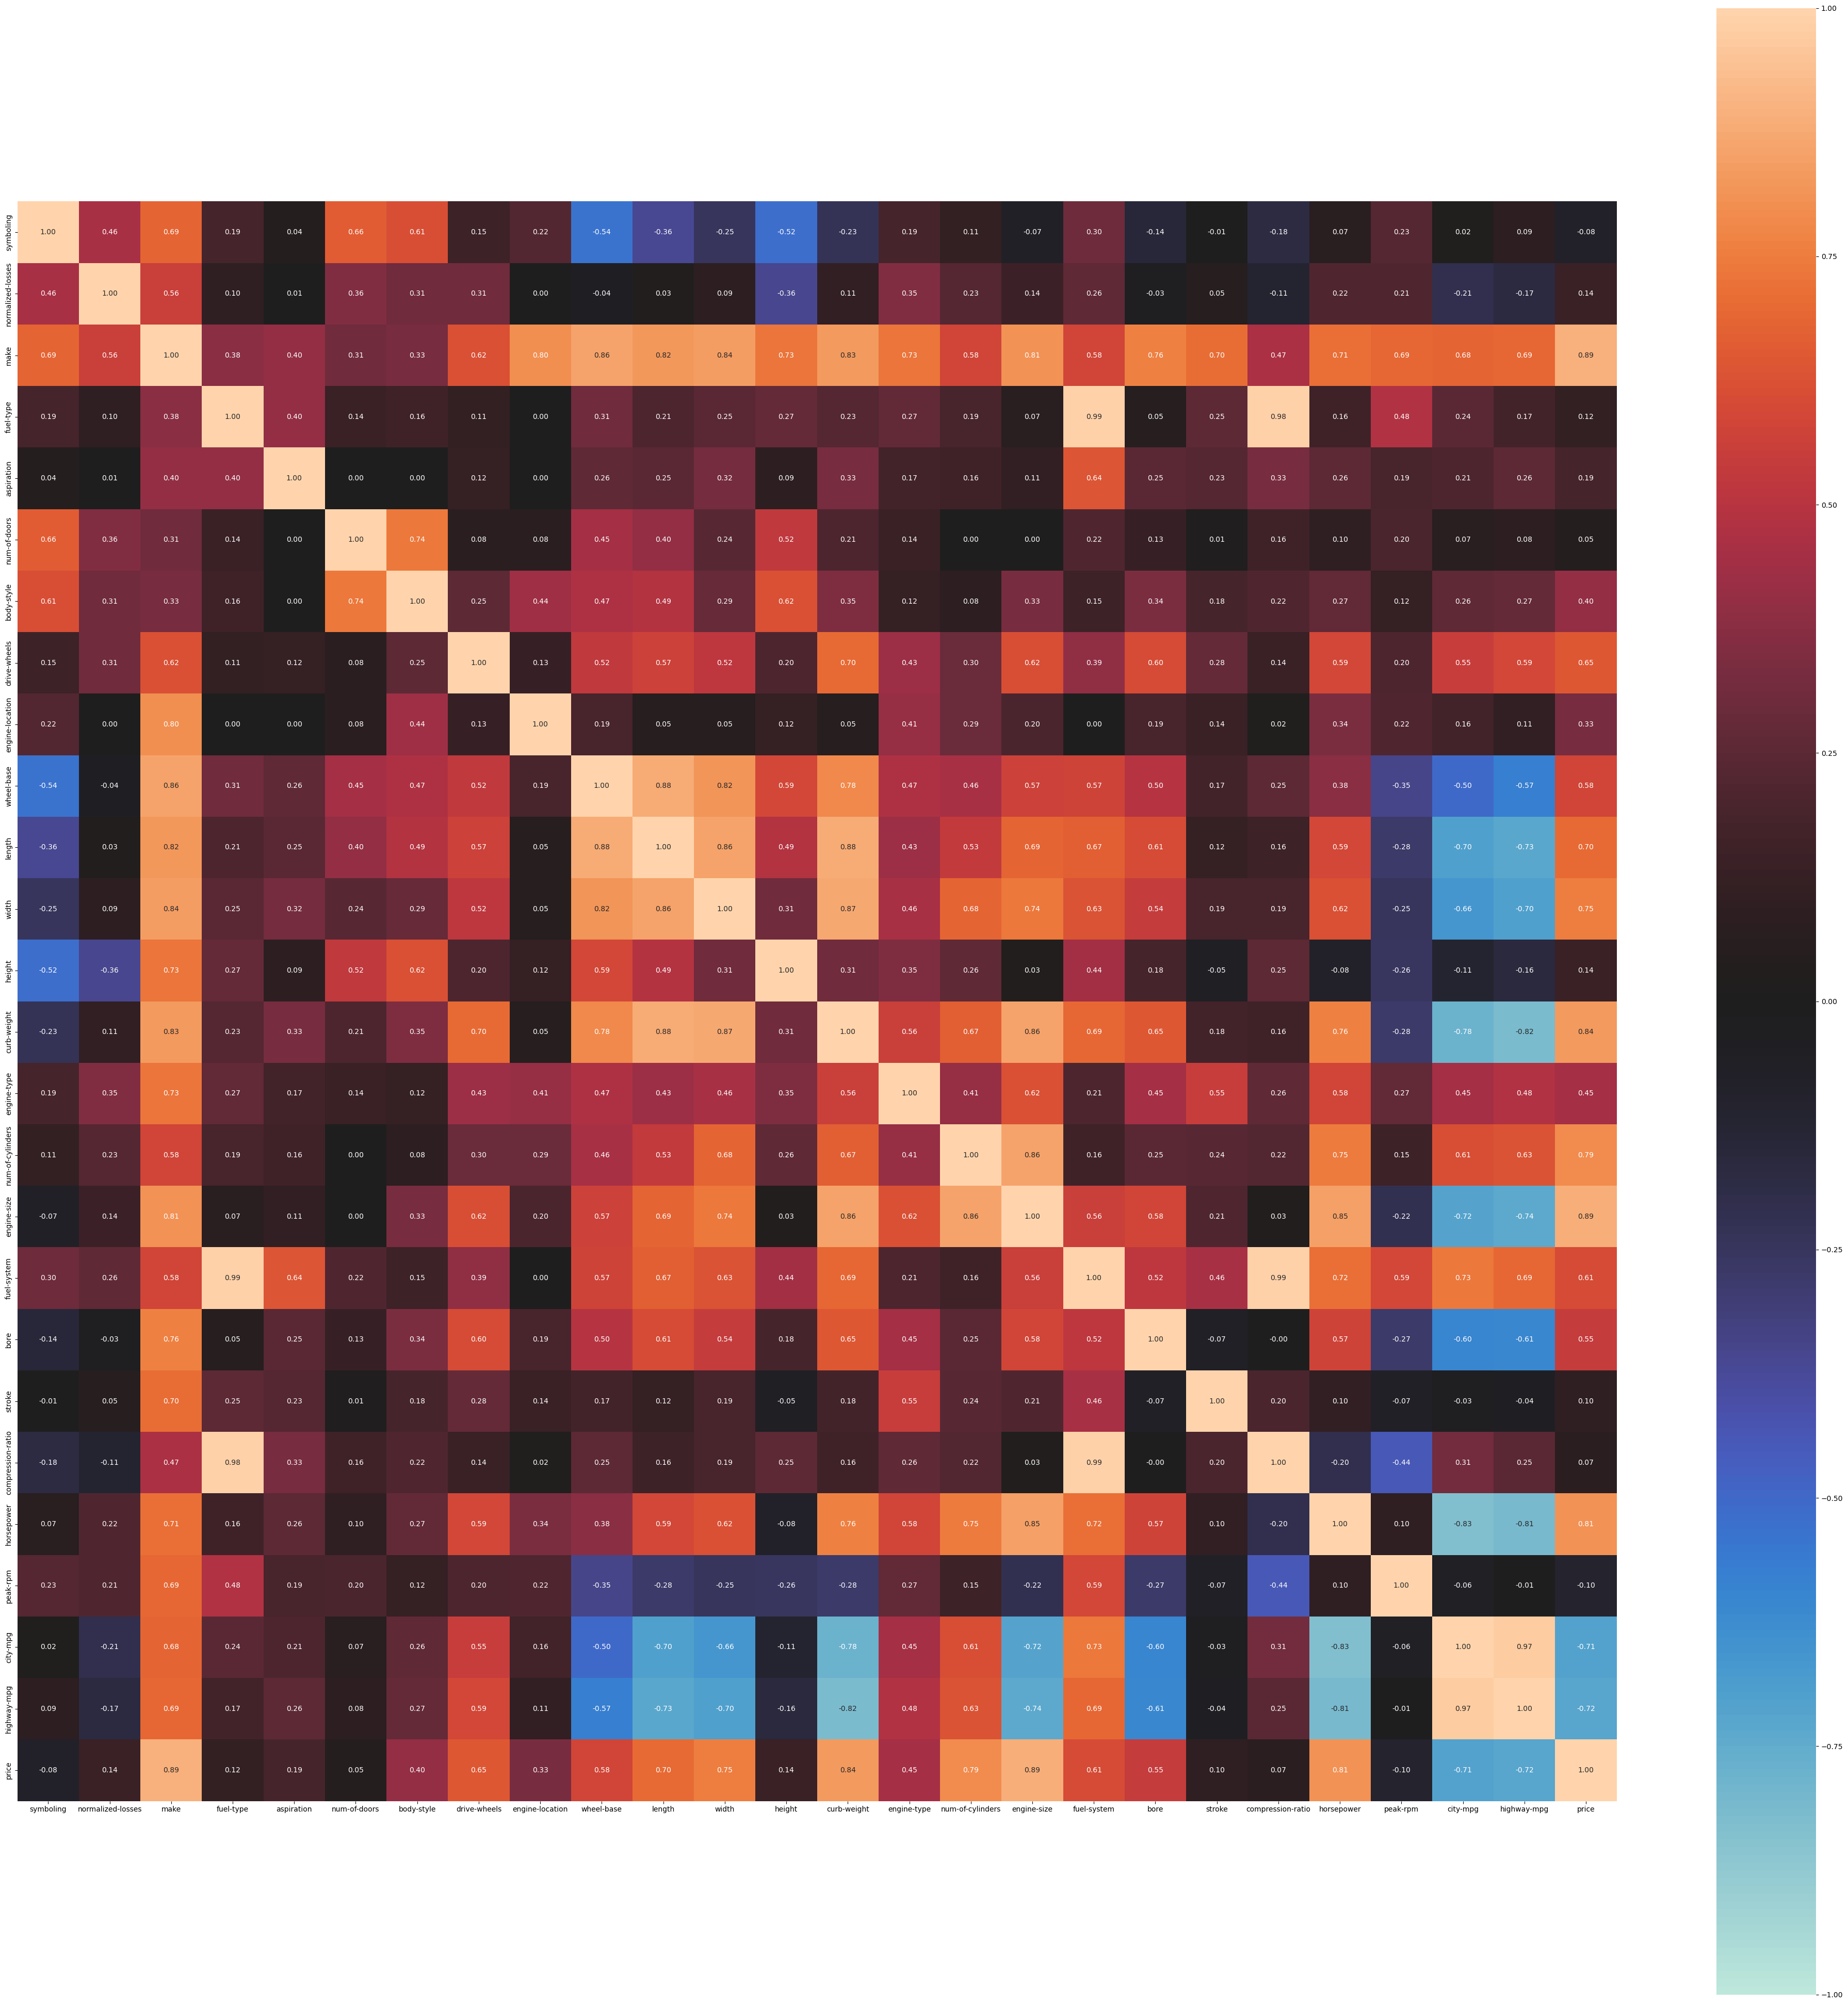

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
symboling,1.000000,0.455135,0.686565,0.185730,0.042855,0.659122,0.613002,0.154695,0.224529,-0.536516,...,-0.068327,0.300761,-0.144785,-0.010884,-0.175160,0.069491,0.227899,0.017639,0.085775,-0.084835
normalized-losses,0.455135,1.000000,0.559295,0.097808,0.007493,0.355703,0.305731,0.307063,0.002785,-0.043395,...,0.142821,0.262221,-0.025608,0.054589,-0.112980,0.217727,0.213594,-0.208081,-0.166290,0.138700
make,0.686565,0.559295,1.000000,0.380131,0.403516,0.307566,0.328432,0.619567,0.803272,0.859091,...,0.812269,0.584371,0.760610,0.704270,0.467479,0.714414,0.691590,0.682665,0.687811,0.893447
fuel-type,0.185730,0.097808,0.380131,1.000000,0.403328,0.140555,0.156804,0.112777,0.000000,0.310196,...,0.066091,0.986824,0.052378,0.253837,0.984951,0.156712,0.477885,0.242396,0.174032,0.115440
aspiration,0.042855,0.007493,0.403516,0.403328,1.000000,0.000000,0.000000,0.117189,0.000000,0.263988,...,0.109131,0.640238,0.247400,0.232950,0.332095,0.255771,0.193908,0.205628,0.256251,0.186073
num-of-doors,0.659122,0.355703,0.307566,0.140555,0.000000,1.000000,0.741987,0.076493,0.076909,0.447460,...,0.003019,0.217891,0.127156,0.008421,0.161471,0.097046,0.200355,0.068485,0.082160,0.046460
body-style,0.613002,0.305731,0.328432,0.156804,0.000000,0.741987,1.000000,0.252325,0.436003,0.474076,...,0.330477,0.153685,0.336717,0.179713,0.215311,0.271186,0.120482,0.262937,0.273691,0.401739
drive-wheels,0.154695,0.307063,0.619567,0.112777,0.117189,0.076493,0.252325,1.000000,0.129623,0.523548,...,0.616785,0.394052,0.603936,0.279188,0.137582,0.592506,0.203955,0.552117,0.587562,0.648366
engine-location,0.224529,0.002785,0.803272,0.000000,0.000000,0.076909,0.436003,0.129623,1.000000,0.192972,...,0.199546,0.000000,0.189345,0.139339,0.020386,0.343559,0.215106,0.164217,0.106960,0.330848
wheel-base,-0.536516,-0.043395,0.859091,0.310196,0.263988,0.447460,0.474076,0.523548,0.192972,1.000000,...,0.568375,0.571398,0.495957,0.174225,0.252234,0.377040,-0.350823,-0.504499,-0.571771,0.584951


In [532]:
categorical_features = identify_nominal_columns(df)

complete_correlation = associations(
    df, filename='correlation_matrix.png', figsize=(50, 50))

df_complete_corr = complete_correlation['corr']
df_complete_corr.dropna(axis=1, how='all').dropna(
    axis=0, how='all')


## Resetting dataset and removing unwanted features based on relation of every other feature with "price"

In [533]:
df.shape

(193, 26)

In [534]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [535]:
df = pd.read_csv("data.csv", header=None, names=col_names)

df = df.drop(columns=["compression-ratio", "stroke", "peak-rpm",
             "num-of-doors", "normalized-losses", "symboling"])

df.replace("?", float("NaN"), inplace=True)
df["price"] = pd.to_numeric(df["price"])
df["bore"] = pd.to_numeric(df["bore"])
df["horsepower"] = pd.to_numeric(df["horsepower"])

for i in df.columns:
    if (df[i].isnull().sum() != 0):
        df = df.drop(list((df.loc[df[i].isnull()]).index))
df.reset_index(drop=True, inplace=True)


In [536]:
df.head()

,make,fuel-type,aspiration,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,horsepower,city-mpg,highway-mpg,price
0,alfa-romero,gas,std,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,111.0,21,27,13495.0
1,alfa-romero,gas,std,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,111.0,21,27,16500.0
2,alfa-romero,gas,std,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,154.0,19,26,16500.0
3,audi,gas,std,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,102.0,24,30,13950.0
4,audi,gas,std,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,115.0,18,22,17450.0


In [537]:
df.shape

(195, 20)

# Visualization

## Bargraph

<BarContainer object of 195 artists>

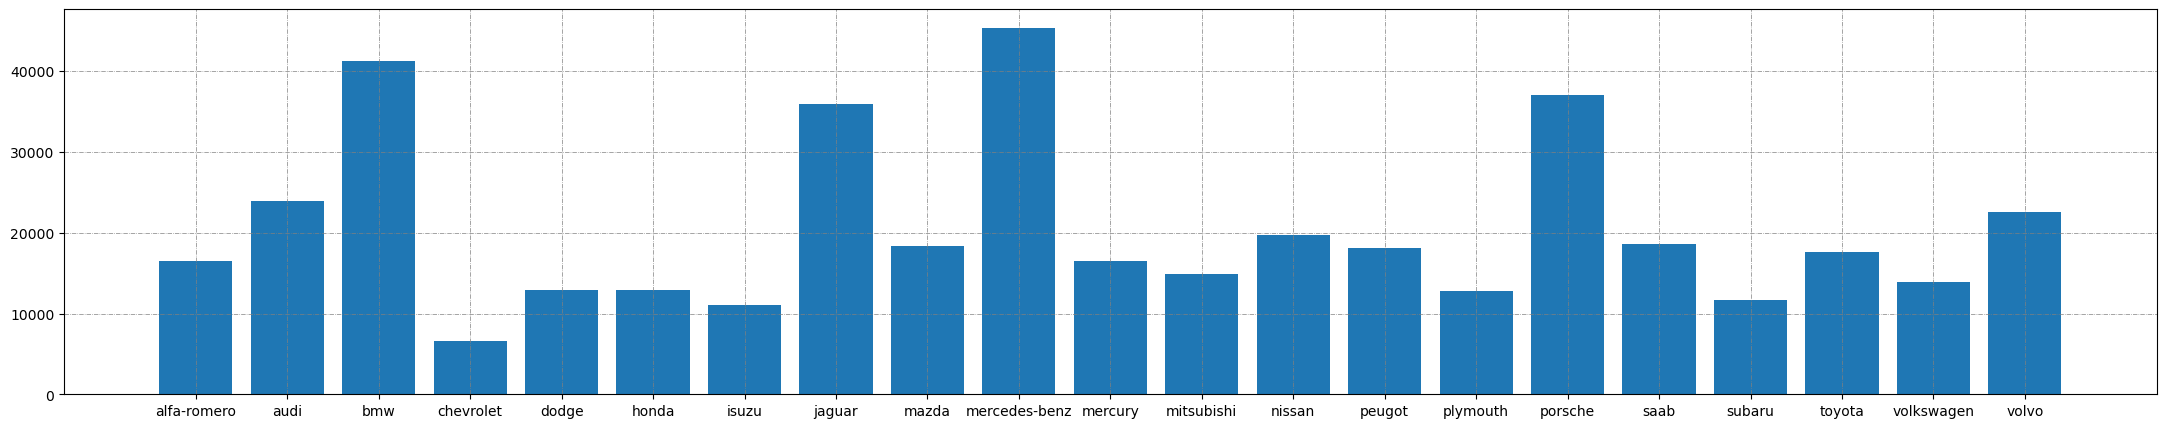

In [538]:
fig, ax = plt.subplots(figsize=(27,5))
ax.grid(True, color="grey",
        linestyle ='-.', linewidth = 0.5)
plt.bar(df["make"], df["price"])

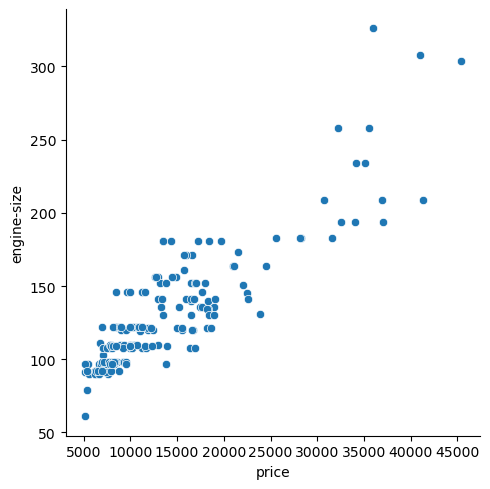

In [539]:
sb.relplot(
    data=df,
    x="price", y="engine-size"
)


# Perform feature extraction using Principal Component Analysis (PCA).

In [540]:
df

,make,fuel-type,aspiration,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,horsepower,city-mpg,highway-mpg,price
0,alfa-romero,gas,std,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,111.0,21,27,13495.0
1,alfa-romero,gas,std,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,111.0,21,27,16500.0
2,alfa-romero,gas,std,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,154.0,19,26,16500.0
3,audi,gas,std,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,102.0,24,30,13950.0
4,audi,gas,std,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,115.0,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,volvo,gas,std,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,114.0,23,28,16845.0
191,volvo,gas,turbo,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,160.0,19,25,19045.0
192,volvo,gas,std,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,134.0,18,23,21485.0
193,volvo,diesel,turbo,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,106.0,26,27,22470.0


In [541]:
# First 18 columns
x = df.iloc[:,:-1].values
# the 19th(price) column
# y = df.iloc[:,-1].values
y = df.iloc[:,-1].values

## Encoding the string value features using "One Hot Encoder"

In [542]:
columnsToEncode = list(df.select_dtypes(object).columns)
print(columnsToEncode)
columnsIndexToEncode = []
for i in columnsToEncode:
    columnsIndexToEncode.append(df.columns.get_loc(i))


['make', 'fuel-type', 'aspiration', 'body-style', 'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders', 'fuel-system']


In [543]:
print(np.iterable(x))
print("______________________________________")
print(np.iterable(y))


True
______________________________________
True


In [544]:
ct = ColumnTransformer(
    transformers=[('encoder', OneHotEncoder(), columnsIndexToEncode)], remainder='passthrough')
x = np.array(ct.fit_transform(x))

In [545]:
print(np.iterable(x))
print("______________________________________")
print(np.iterable(y))
print(x)

True
______________________________________
True
[[1.0 0.0 0.0 ... 111.0 21 27]
 [1.0 0.0 0.0 ... 111.0 21 27]
 [1.0 0.0 0.0 ... 154.0 19 26]
 ...
 [0.0 0.0 0.0 ... 134.0 18 23]
 [0.0 0.0 0.0 ... 106.0 26 27]
 [0.0 0.0 0.0 ... 114.0 19 25]]


## Splitting data into train and test

In [546]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=1)


In [547]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)


In [548]:
pca = PCA(n_components=2)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

# Model selection and K-Fold Cross Validation on the regression models

## Model selection

# PREDICTION

In [549]:
linRegClassifier = LinearRegression()
linRegClassifier.fit(x_train, y_train)


LinearRegression()

In [550]:
y_pred = linRegClassifier.predict(x_test)


In [551]:
# model evaluation
print(
    'mean_squared_error : ', mean_squared_error(y_test, y_pred))
print(
    'mean_absolute_error : ', mean_absolute_error(y_test, y_pred))

mean_squared_error :  16695205.906860767
mean_absolute_error :  2954.197552333321


In [552]:
# Enter Code
####################

accuracies = cross_val_score(
    estimator=linRegClassifier, X=x_train, y=y_train, cv=10)

print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))


Accuracy: 57.16 %
Standard Deviation: 41.71 %


In [553]:
svr = SVR()
svr.fit(x_train,y_train)

SVR()

In [554]:
pred_y_svr = svr.predict(x_test)

In [555]:
accuracies = cross_val_score(
    estimator=svr, X=x_train, y=y_train, cv=10)

print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))


Accuracy: -35.63 %
Standard Deviation: 45.44 %


In [556]:
model = ensemble.GradientBoostingRegressor()
model.fit(x_train,y_train)

GradientBoostingRegressor()

In [557]:
pred_y_svr = model.predict(x_test)

In [558]:
accuracies = cross_val_score(
    estimator=model, X=x_train, y=y_train, cv=10)

print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))


Accuracy: 74.52 %
Standard Deviation: 22.75 %
